<a href="https://colab.research.google.com/github/JackCollins1991/GoogleColabs/blob/LogisticRegressionAssumptions/LogisticRegressionAssumptionsHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from copy import deepcopy
!pip install factor_analyzer
!pip install seaborn

import seaborn as sb
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

In [104]:
class LogisticRegressionAssumptionsTestSummary:
  def __init__(self, dependant_figure, vif, heatmap):
    self.dependant_figure = dependant_figure
    self.vif = vif
    self.heatmap = heatmap

def LogisticRegressionAssumptionsTest(predictors, dependant):
  class_fig = TestClassBalance(dependant)
  TestLinearityAssumption(predictors)
  TestInfluentialValues(predictors)
  vif_fig = TestMulticollinearity(predictors)
  heatmap = TestCorrelations(predictors)
  
  result = LogisticRegressionAssumptionsTestSummary(class_fig, vif_fig, heatmap)

  return result


def TestClassBalance(dependant):
  p = plt.bar(dependant, height = max(dependant.value_counts()))
  return p

def TestLinearityAssumption(predictors):
  
  return 

def TestInfluentialValues(predictors):

  return

def TestMulticollinearity(predictors):
  vif_data = pd.DataFrame()
  vif_data["feature"] = predictors.columns
  vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
                          for i in range(len(predictors.columns))]

  return vif_data

def TestCorrelations(predictors):
    heatmap = sb.heatmap(predictors.corr())
    return heatmap


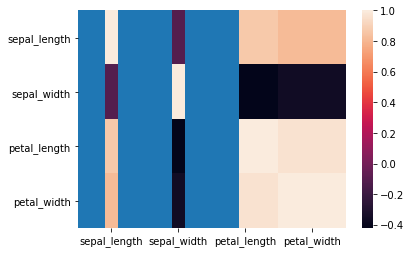

In [103]:
predictors = data.select_dtypes(include='number')
dependant = data["class"]
class_fig, vif_fig, heatmap = LogisticRegressionAssumptionsTest(predictors, dependant)
